In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import *

In [2]:
modules = [
    # 45-210 (DP 4)
    'V5-1-010',
    'V5-1-013',
    'V5-1-014',
    'V5-1-019',
    'V5-1-021',
    'V5-1-032',
    # 45-220 (DP 5)
    'V5-1-011',
    'V5-1-029',
    'V5-1-030',
    'V5-1-031',
    'V5-1-034',
    'V5-1-038',
    # 56-210 (DP 11)
    'V5-1-024',
    'V5-1-040',
    'V5-1-049',
    'V5-1-044',
    'V5-1-027',
    'V5-1-022',
    # 56-220 (DP 10)
    'V5-1-042',
    'V5-1-028',
    'V5-1-035',
    'V5-1-041',
    'V5-1-025',
    'V5-1-047',
]

In [3]:
def plotIV(module,color_index,max_colors):
    folder_path = '/eos/user/t/totdaq/PPS-tests/'+module+'/'
    
    # Get a list of all files in the folder
    all_files = os.listdir(folder_path)

    # Filter files that end with '_IV.dat'
    filtered_files = [file for file in all_files if file.endswith('_IV.dat') and (not file.startswith('.'))]

    # Check if there are any matching files
    if not filtered_files:
        print("No IV file found in "+folder_path)
        return
    else:
        # Get the most recent file based on modification time
        most_recent_file = max(filtered_files, key=lambda f: os.path.getmtime(os.path.join(folder_path, f)))
        file_path=os.path.join(folder_path, most_recent_file)
    # Read data from the file, ignoring lines starting with #
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            line=line.rstrip()
            if not line.startswith('#') and len(line.rstrip()) != 0:
                data.append(line.split())

    # Extract columns
    Vmon = [float(row[0]) for row in data]
    Imon = [float(row[1]) for row in data]
    
    colors = viridis(np.linspace(0, 1, max_colors))
    plt.plot(Vmon, Imon, marker='', linestyle='-', label=module, color=colors[color_index])

In [4]:
def orderLowToHigh(modules):
    averages = []
    for module in modules:
        folder_path = '/eos/user/t/totdaq/PPS-tests/'+module+'/'
    
        # Get a list of all files in the folder
        all_files = os.listdir(folder_path)

        # Filter files that end with '_IV.dat'
        filtered_files = [file for file in all_files if file.endswith('_IV.dat') and (not file.startswith('.'))]

        # Check if there are any matching files
        if not filtered_files:
            print("No IV file found in "+folder_path)
            averages.append(0)
        else:
            # Get the most recent file based on modification time
            most_recent_file = max(filtered_files, key=lambda f: os.path.getmtime(os.path.join(folder_path, f)))
            file_path=os.path.join(folder_path, most_recent_file)
            
        data = []
        with open(file_path, 'r') as file:
            for line in file:
                line=line.rstrip()
                if not line.startswith('#') and len(line.rstrip()) != 0:
                    data.append(line.split())
        # Extract columns
        Vmon = [float(row[0]) for row in data]
        Imon = [float(row[1]) for row in data]
        
        # Filter data based on V values between 40 and 60
        filtered_data = [(V, I) for V, I in zip(Vmon, Imon) if 40 <= V <= 60]
        # Calculate the average Imon, or set to 0 if no data points in the range
        if filtered_data:
            average_imon = sum(Imon for _, Imon in filtered_data) / len(filtered_data)
        else:
            average_imon = 900
        averages.append(average_imon)
    # Sort the averages from lower to highest
    sorted_indices = np.argsort(averages)

    # Get the indices that would sort the array of indices
    positions = np.argsort(sorted_indices)
    return positions


No IV file found in /eos/user/t/totdaq/PPS-tests/V5-1-011/


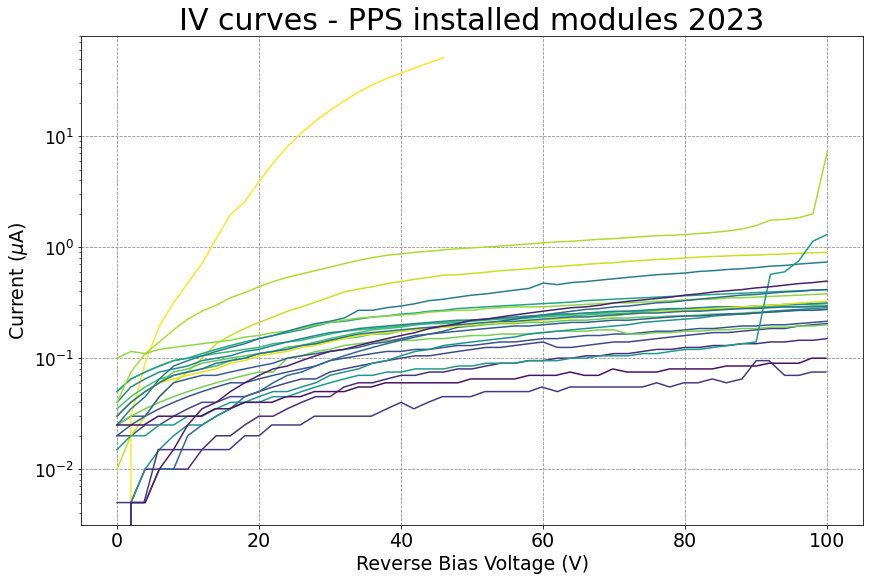

In [12]:
# Plot the data
fig = plt.figure(figsize=(14,9))

positions = orderLowToHigh(modules)
for i,module in enumerate(modules):
    if positions[i]:
        plotIV(module,positions[i],len(positions))
ax = plt.gca()
ax.set_yscale('log')

# Plot styling
plt.xlabel('Reverse Bias Voltage (V)', fontsize=19)
plt.ylabel(r'Current ($\mu$A)', fontsize=19)
plt.xticks(fontsize=19)
plt.yticks(fontsize=17)
plt.title('IV curves - PPS installed modules 2023',fontsize=30)
#plt.legend(fontsize=22)
plt.grid(True)
ax.xaxis.grid(color='#918d8c', linestyle='--')
ax.yaxis.grid(color='#918d8c', linestyle='--')
plt.show()

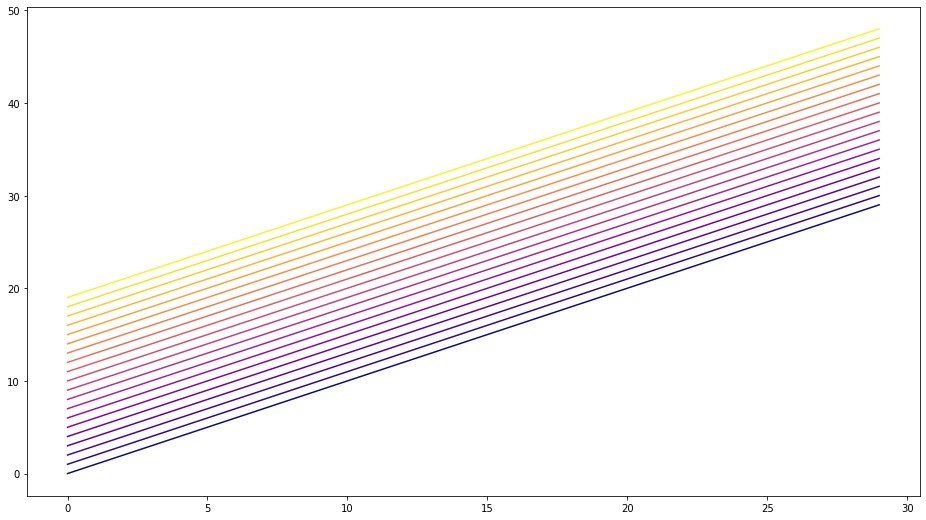

In [10]:
n_plots = 20
fig = plt.figure(figsize=(16,9))
ax = plt.gca()
colors = plasma(np.linspace(0, 1, n_plots))
for i in range(n_plots):
    x = []
    y = []
    for j in range(30):
        x.append(j)
        y.append(j+i)
    ax.plot(x,y,color=colors[i])